## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.max_colwidth = 100
import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#IMG_SIZE= 224
#BATCH = 32
IMG_SIZE = 128

BATCH = 16

SEED = 42

## Loading Dataset

In [ ]:
import os
import glob

train_path = "/content/drive/MyDrive/train"
test_path = "/content/drive/MyDrive/test"

train_normal = glob.glob(os.path.join(train_path, "NORMAL", "*.*"))
train_pneumonia = glob.glob(os.path.join(train_path, "PNEUMONIA", "*.*"))

test_normal = glob.glob(os.path.join(test_path, "NORMAL", "*.*"))
test_pneumonia = glob.glob(os.path.join(test_path, "PNEUMONIA", "*.*"))




In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [ ]:
df_train.head()

,class,image
0,Normal,/content/drive/MyDrive/train/NORMAL/NORMAL-3333785-0001.jpeg
1,Normal,/content/drive/MyDrive/train/NORMAL/NORMAL-3399582-0001.jpeg
2,Normal,/content/drive/MyDrive/train/NORMAL/NORMAL-3400382-0002.jpeg
3,Normal,/content/drive/MyDrive/train/NORMAL/NORMAL-338872-0001.jpeg
4,Normal,/content/drive/MyDrive/train/NORMAL/NORMAL-3532468-0001.jpeg


In [ ]:
df_test

,class,image
0,Normal,/content/drive/MyDrive/test/NORMAL/NORMAL-1160949-0001.jpeg
1,Normal,/content/drive/MyDrive/test/NORMAL/NORMAL-115218-0001.jpeg
2,Normal,/content/drive/MyDrive/test/NORMAL/NORMAL-11419-0001.jpeg
3,Normal,/content/drive/MyDrive/test/NORMAL/NORMAL-1049278-0001.jpeg
4,Normal,/content/drive/MyDrive/test/NORMAL/NORMAL-1212407-0001.jpeg
...,...,...
619,Pneumonia,/content/drive/MyDrive/test/PNEUMONIA/VIRUS-9476607-0001.jpeg
620,Pneumonia,/content/drive/MyDrive/test/PNEUMONIA/VIRUS-8903181-0001.jpeg
621,Pneumonia,/content/drive/MyDrive/test/PNEUMONIA/VIRUS-9342284-0001.jpeg
622,Pneumonia,/content/drive/MyDrive/test/PNEUMONIA/VIRUS-9240664-0001.jpeg


## Exploring Data

In [ ]:
print("Train Normal:", len(train_normal))
print("Train Pneumonia:", len(train_pneumonia))
print("Test Normal:", len(test_normal))
print("Test Pneumonia:", len(test_pneumonia))

Train Normal: 1349
Train Pneumonia: 3883
Test Normal: 234
Test Pneumonia: 390


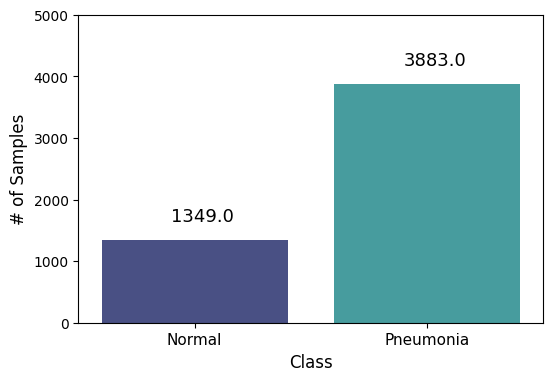

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()

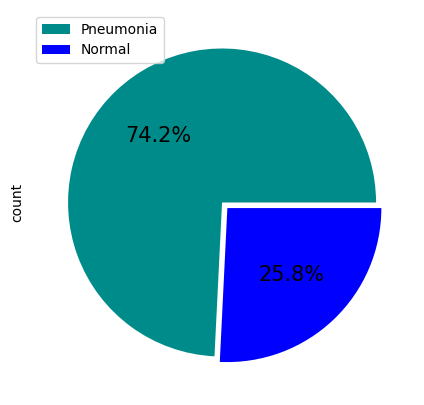

In [ ]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

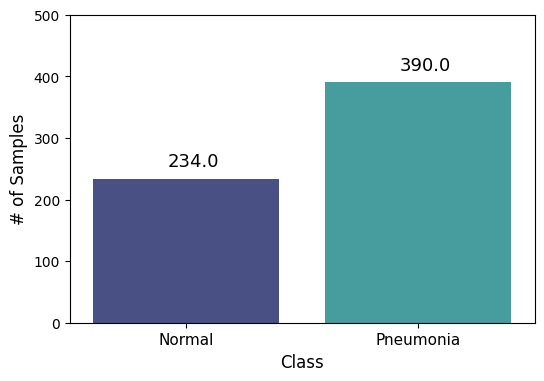

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)

plt.show()

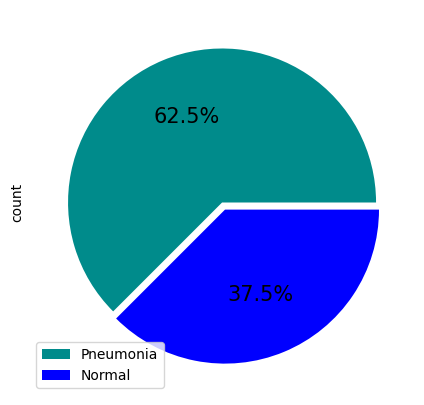

In [ ]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

###Imbalanced data

Train Set - Normal


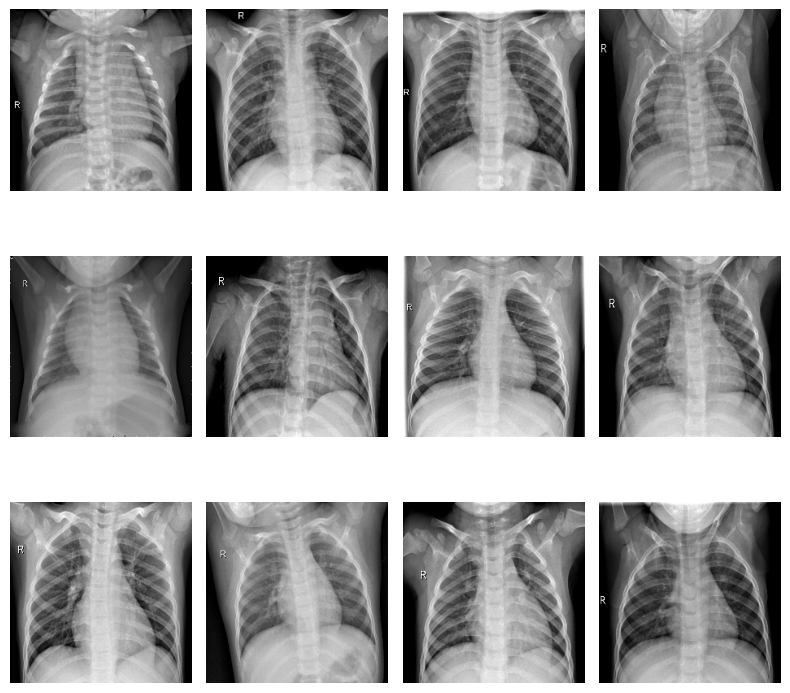

In [ ]:
print('Train Set - Normal')

plt.figure(figsize=(8,8))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


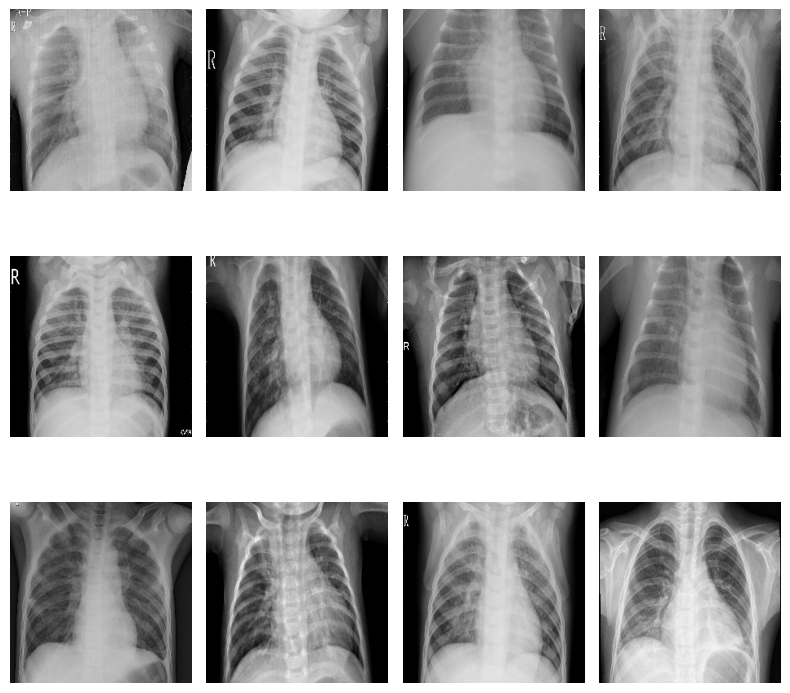

In [ ]:
print('Train Set - Pneumonia')

plt.figure(figsize=(8,8))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Normal


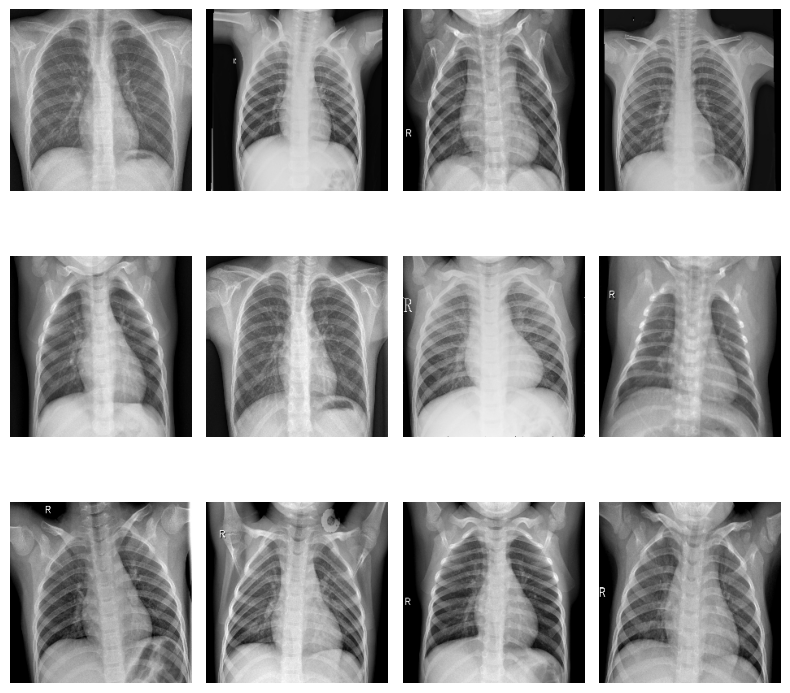

In [ ]:
print('Test Set - Normal')

plt.figure(figsize=(8,8))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Pneumonia


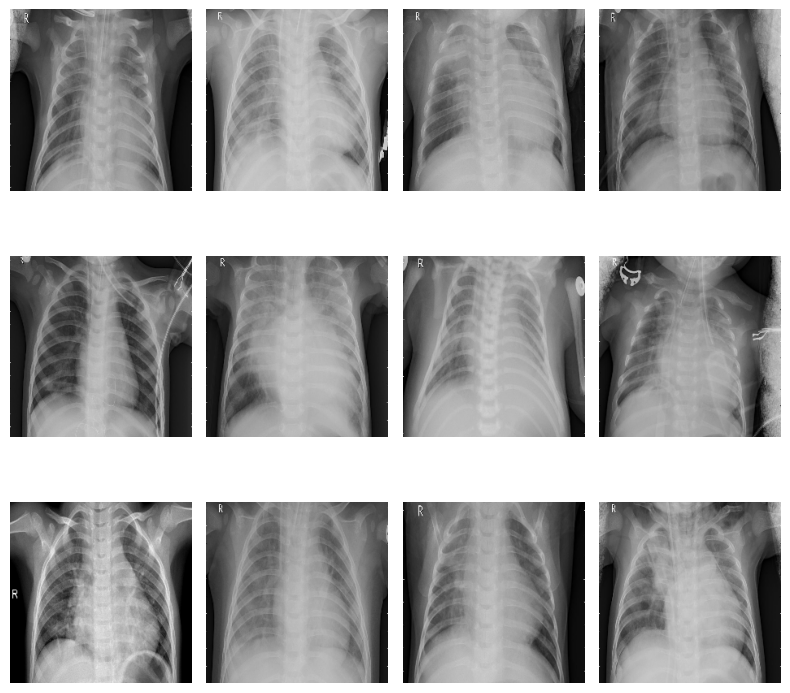

In [ ]:
print('Test Set - Pneumonia')

plt.figure(figsize=(8,8))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

## Preparing Data
(Data Augmentation)

In [ ]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    zoom_range=0.1,
    # rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Validation/test data generator
val_datagen = ImageDataGenerator(rescale=1/255.)

# Training dataset
ds_train = train_datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',
    batch_size=BATCH,
    seed=SEED
)

# Validation split from training data
val_df, _ = train_test_split(df_train, test_size=0.2, random_state=SEED)

# Validation dataset
ds_val = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',
    batch_size=BATCH,
    seed=SEED
)

# Test dataset
ds_test = val_datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',
    batch_size=1,
    shuffle=False
)


Found 5232 validated image filenames belonging to 2 classes.
Found 4185 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [ ]:
# Early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

# Learning rate reduction on plateau
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_delta=1e-7,
    cooldown=0,
    verbose=1
)


In [ ]:
def get_model():
    # Input layer: image size (IMG_SIZE x IMG_SIZE), RGB channels
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Block 1: Conv + BN + ReLU + MaxPool + Dropout
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block 2: Conv + BN + ReLU + MaxPool + Dropout
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block 3: 2x Conv + BN + ReLU + MaxPool + Dropout
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Dense head: Flatten → Dense → Dropout
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output layer: 1 neuron with sigmoid (binary classification)
    output = layers.Dense(1, activation='sigmoid')(x)

    # Model definition
    model = keras.Model(inputs=[inputs], outputs=output)

    return model


In [ ]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics=['binary_accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50, 50, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,560,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │              

 Total params: 2,621,089 (10.00 MB)

 Trainable params: 2,620,865 (10.00 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
# Model training
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 5,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=len(df_train) // BATCH,
          validation_steps=len(val_df) // BATCH)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 2246s 14s/step - binary_accuracy: 0.7102 - loss: 0.6882 - val_binary_accuracy: 0.7462 - val_loss: 0.9668 - learning_rate: 3.0000e-05
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - binary_accuracy: 0.8438 - loss: 0.3465 - val_binary_accuracy: 0.7466 - val_loss: 0.9640 - learning_rate: 3.0000e-05
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 861s 5s/step - binary_accuracy: 0.8343 - loss: 0.3685 - val_binary_accuracy: 0.7478 - val_loss: 1.5884 - learning_rate: 3.0000e-05
Epoch 4/5
  1/163 ━━━━━━━━━━━━━━━━━━━━ 9:33 4s/step - binary_accuracy: 0.8125 - loss: 0.3597
Epoch 4: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
163/163 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - binary_accuracy: 0.8125 - loss: 0.3597 - val_binary_accuracy: 0.7476 - val_loss: 1.5932 - learning_rate: 3.0000e-05
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 840s 5s/step - binary_accuracy: 0.8862 - loss: 0.2711 - val_binary_accuracy: 0.7471 - val_loss: 1.5460 - learning_rate:

In [ ]:
# Model Evaluation
score = model.evaluate(ds_val, steps = len(val_df)//BATCH, verbose = 0)
print('train loss:', score[0])
print('train accuracy:', score[1])

train loss: 0.9604359269142151
train accuracy: 0.7475961446762085


In [ ]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4201809167861938
Test accuracy: 0.625


## Improvements


### Update CNN Architecture

In [ ]:
#IMG_SIZE_reduced = 128
#BATCH_reduced = 16

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def get_model1():
    # Input Shape
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Block One
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)

    # Block Two
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)

    # Block Three
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)

    # Block Four (Extra Depth)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)

    # Global Average Pooling (Prevents Overfitting)
    x = layers.GlobalAveragePooling2D()(x)

    # Dense Layers (Fully Connected)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)  # Dropout helps regularization
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Output Layer (Binary Classification)
    output = layers.Dense(1, activation='sigmoid')(x)

    # Compile Model

    model = models.Model(inputs, output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    return model


In [ ]:
keras.backend.clear_session()

model1 = get_model1()
model1.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics=['binary_accuracy'])

model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,7

 Total params: 1,272,993 (4.86 MB)

 Trainable params: 1,272,033 (4.85 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Training new model
history = model1.fit(ds_train,
          batch_size = BATCH, epochs = 5,
          validation_data=ds_val,
            callbacks=[early_stopping, plateau],
          steps_per_epoch=len(df_train) // BATCH,
          validation_steps=len(val_df) // BATCH)

Epoch 1/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 536s 2s/step - binary_accuracy: 0.8118 - loss: 0.3987 - val_binary_accuracy: 0.7471 - val_loss: 1.8117 - learning_rate: 3.0000e-05
Epoch 2/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 203s 526ms/step - binary_accuracy: 0.8993 - loss: 0.2373 - val_binary_accuracy: 0.9535 - val_loss: 0.1412 - learning_rate: 3.0000e-05
Epoch 3/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 174s 440ms/step - binary_accuracy: 0.9385 - loss: 0.1628 - val_binary_accuracy: 0.9490 - val_loss: 0.1273 - learning_rate: 3.0000e-05
Epoch 4/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 204s 448ms/step - binary_accuracy: 0.9428 - loss: 0.1551 - val_binary_accuracy: 0.8930 - val_loss: 0.2353 - learning_rate: 3.0000e-05
Epoch 5/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - binary_accuracy: 0.9486 - loss: 0.1392
Epoch 5: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
327/327 ━━━━━━━━━━━━━━━━━━━━ 202s 447ms/step - binary_accuracy: 0.9486 - loss: 0.1392 - val_binary_accuracy: 0.7397 - val_loss: 0.6948 - lea

In [ ]:
#New Model evaluation
score = model1.evaluate(ds_val, steps = len(val_df)//BATCH, verbose = 0)
print('train loss:', score[0])
print('train accuracy:', score[1])

train loss: 0.1273675262928009
train accuracy: 0.9489942789077759


In [ ]:
score = model1.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20287363231182098
Test accuracy: 0.9278846383094788


### Performance Metrics

In [ ]:
ds_test.reset()
predictions = model1.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score,roc_curve,confusion_matrix
true_labels = ds_test.classes  # Extract true labels
cm_df = pd.DataFrame(confusion_matrix(true_labels,pred_labels))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,199,35
Actual 1,10,380


In [ ]:
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       234
           1       0.92      0.97      0.94       390

    accuracy                           0.93       624
   macro avg       0.93      0.91      0.92       624
weighted avg       0.93      0.93      0.93       624



### ROC-AUC

In [ ]:
roc_auc=roc_auc_score(true_labels, pred_labels)
print('ROC AUC=%.3f' % roc_auc)

ROC AUC=0.912


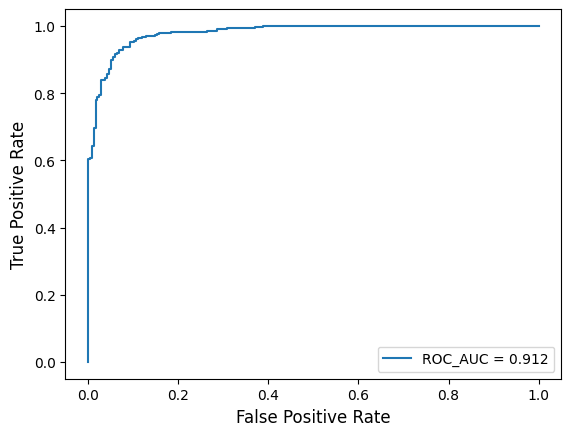

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(true_labels, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()